In [1]:
import riskModelBuilder as rmb
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import preprocessing as skpre
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
min_set = [
    'index',
    'addedroadt',
    'adt',
    'accesscont',
    'adtderivat',
    'adtstation',
    'adtyear',
    'assigned_1',
    'city',
    'county',
    'crn',
    'curbs',
    'dateactive',
    'equation_1',
    'equationro',
    'facilityty',
    'federalaid',
    'fromcity',
    'fromendtyp',
    'frommeasur',
    'fromstate',
    'fromstreet',
    'functional',
    'futurefaci',
    'hpmscode',
    'hpmssample',
    'iri',
    'iriyear',
    'iristatus',
    'item_id',
    'jurisdicti',
    'leftshou_1',
    'leftshould',
    'leftsidewa',
    'lifecycles',
    'massdothig',
    'mhs',
    'mileagecou',
    'mpo',
    'municipals',
    'nhsstatus',
    'numberofpe',
    'opposingdi',
    'oppositenu',
    'psi',
    'psiyear',
    'rightsho_1',
    'rightshoul',
    'rightsidew',
    'rpa',
    'roadinvent',
    'roadsegmen',
    'routedirec',
    'routefrom',
    'routequali',
    'routekey',
    'routenumbe',
    'routesyste',
    'routeto',
    'routetype',
    'urbanizeda',
    'undivide_1',
    'undividedl',
    'shape_len',
    'speedlimit',
    'streetlist',
    'streetna_1',
    'streetname',
    'streetoper',
    'subroute',
    'surfacetyp',
    'surfacewid',
    'tocity',
    'toendtype',
    'tollroad',
    'tomeasure',
    'tostate',
    'tostreetna',
    'trucknetwo',
    'truckroute']

In [22]:
mb.table.columns

Index(['assignedle', 'federalfun', 'mediantype', 'medianwidt', 'numberoftr',
       'rightofway', 'structural', 'terrain', 'urbantype', 'naccidents',
       'acc_risk'],
      dtype='object')

In [3]:
# Gather all data and do some cleaning

mb = rmb.Alldata('roadInventory', 'segments_full')
mb.getData()
mb.cleanData(todrop=min_set)

In [60]:
# Perform a random forest regression 

trainer = rmb.Model()

y = mb.traindata[:,-1]
X = mb.traindata[:,:-1]

n_estimators = 100
test_frac = 0.2
score, oob_score, rf_pred, y_test= trainer.rf_regression(X, y, n_estimators, test_frac)
pred_max = np.max(rf_pred)

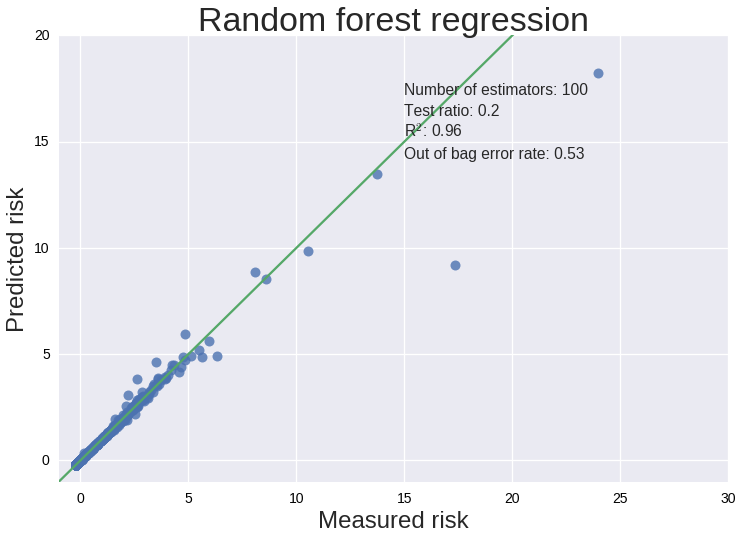

In [62]:
fig = sb.regplot(y_test, rf_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1, None], xlim=[-1, None])

# Set the size of the graph from here
fig.figure.set_size_inches(12,8)
# Set the Title of the graph from here
fig.axes.set_title('Random forest regression', fontsize=34)
# Set the xlabel of the graph from here
fig.set_xlabel("Measured risk",size = 24)
# Set the ylabel of the graph from here
fig.set_ylabel("Predicted risk",size = 24)
# Set the ticklabel size and color of the graph from here
fig.tick_params(labelsize=14,labelcolor="black")

fig.text(15, pred_max-1, 'Number of estimators: {0}'.format(n_estimators))
fig.text(15, pred_max-2, 'Test ratio: {0}'.format(test_frac))
fig.text(15, pred_max-3, r'R$^2$: {0}'.format(round(score,2)))
fig.text(15, pred_max-4, 'Out of bag error rate: {0}'.format(round(1-oob_score,2)))

fig.plot(np.linspace(-5,50, 1000), np.linspace(-5, 50, 1000))

plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_reg.png', dpi=300)